In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

import pandas as pd
import numpy as np

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 62.6M/62.6M [00:02<00:00, 29.9MB/s]


Extracting files...
Path to dataset files: C:\Users\D\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [17]:
train_df = pd.read_csv(path + "/sign_mnist_train.csv")
test_df = pd.read_csv(path + "/sign_mnist_test.csv")
print(train_df.shape[0] , test_df.shape[0])

27455 7172


In [21]:
y_train = train_df["label"]
y_test = test_df["label"]

X_train = train_df.drop("label", axis=1)
X_test = test_df.drop("label", axis=1)
X_train = X_train / 255
X_test = X_test / 255
X_train = np.array(X_train)
X_test = np.array(X_test)

In [5]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [22]:
# Train a simple MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def build_mlp(hidden_layer_sizes,solver='sgd'):
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes, 
        max_iter=1000, 
        alpha=0,
        solver=solver, 
        verbose=10, 
        tol=1e-4, 
        random_state=1,
        learning_rate_init=.01,
        learning_rate='adaptive',
        activation='relu',
    )
    return model

def train_mlp(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def classify(model):
    # draw loss curve 
    plt.figure(figsize=(16, 9))
    plt.plot(model.loss_curve_)

    # print accuracy and f1 score in percentage
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1)

    # plot confusion matrix
    y_pred = model.predict(X_test)
    y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
    cm = confusion_matrix(y_test_label, y_pred_label)
    plt.figure(figsize=(16, 9))
    plt.matshow(cm)
    plt.show()

def pipeline(*args):
    model = build_mlp(*args)
    model = train_mlp(model, X_train, y_train)
    classify(model)
    return model

Iteration 1, loss = 2.63183853
Iteration 2, loss = 1.68561376
Iteration 3, loss = 1.26915677
Iteration 4, loss = 1.02489862
Iteration 5, loss = 0.85881888
Iteration 6, loss = 0.73420851
Iteration 7, loss = 0.63673975
Iteration 8, loss = 0.55828116
Iteration 9, loss = 0.48925887
Iteration 10, loss = 0.43132931
Iteration 11, loss = 0.38163016
Iteration 12, loss = 0.33663527
Iteration 13, loss = 0.29699361
Iteration 14, loss = 0.26350710
Iteration 15, loss = 0.23620779
Iteration 16, loss = 0.21011024
Iteration 17, loss = 0.18833302
Iteration 18, loss = 0.16957053
Iteration 19, loss = 0.15243265
Iteration 20, loss = 0.13898381
Iteration 21, loss = 0.12604609
Iteration 22, loss = 0.11545370
Iteration 23, loss = 0.10547068
Iteration 24, loss = 0.09685502
Iteration 25, loss = 0.08947922
Iteration 26, loss = 0.08291109
Iteration 27, loss = 0.07722960
Iteration 28, loss = 0.07222736
Iteration 29, loss = 0.06714575
Iteration 30, loss = 0.06276285
Iteration 31, loss = 0.05898269
Iteration 32, los

ValueError: `axis` must be fewer than the number of dimensions (1)

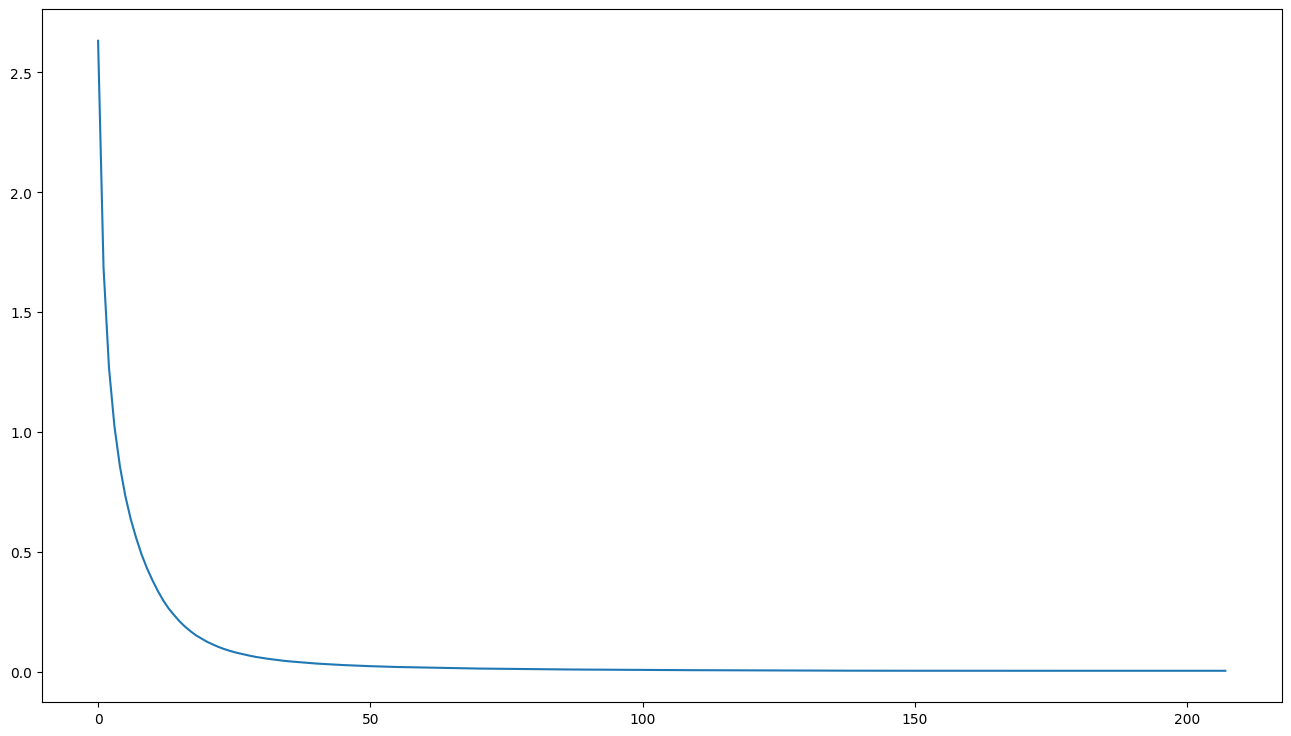

In [23]:
m1 = pipeline((100,))

In [14]:
# print accuracy and f1 score on x_train
y_pred = m1.predict(X_train)
accuracy = m1.score(X_train, y_train)
f1 = f1_score(y_train, y_pred, average='macro')
print("Accuracy: ", accuracy)
print("F1 score: ", f1)

Accuracy:  1.0
F1 score:  1.0


In [8]:
# pipeline((80,10))

# Tensorflow NN

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [10]:
# make pipeline with tensorflow

EPOCHS = 150
def build_mlp_tf(hidden_layer_sizes):
    model = tf.keras.Sequential()    
    model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))
    for size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(size, activation=tf.nn.relu , kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(24, activation=tf.nn.softmax))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def train_mlp_tf(model, X_train, y_train):
    history = model.fit(X_train, y_train, epochs=EPOCHS , validation_data = (X_test, y_test))
    return model , history

def classify(model, history):
    # draw loss curve 
    plt.figure(figsize=(16, 9))
    epochs = [i for i in range(EPOCHS)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16,9)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    # print accuracy and f1 score in percentage
    y_pred = model.predict(X_test)
    accuracy = model.evaluate(X_test, y_test)[1]
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
    y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
    f1 = f1_score(y_test_label, y_pred_label, average='macro')
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1)

    # plot confusion matrix
    cm = confusion_matrix(y_test_label, y_pred_label)
    plt.figure(figsize=(16, 9))
    plt.matshow(cm)
    plt.show()

def pipeline_tf(*args):
    model = build_mlp_tf(*args)
    model , history = train_mlp_tf(model, X_train, y_train)
    classify(model, history)
    return model , history

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,774 (331.15 KB)

 Trainable params: 84,774 (331.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2181 - loss: 3.4564 - val_accuracy: 0.4470 - val_loss: 2.2327
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.4949 - loss: 1.9984 - val_accuracy: 0.4635 - val_loss: 2.1160
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.5763 - loss: 1.7562 - val_accuracy: 0.5573 - val_loss: 1.8484
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.6230 - loss: 1.6468 - val_accuracy: 0.4803 - val_loss: 2.0160
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.6433 - loss: 1.5670 - val_accuracy: 0.5459 - val_loss: 1.8939
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.6723 - loss: 1.5089 - val_accuracy: 0.5839 - val_loss: 1.7693
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.6984 - loss: 1.4309 - val_accuracy: 0.5499 - val_loss: 1.8291
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7154 - loss: 1.3

<Figure size 1600x900 with 0 Axes>

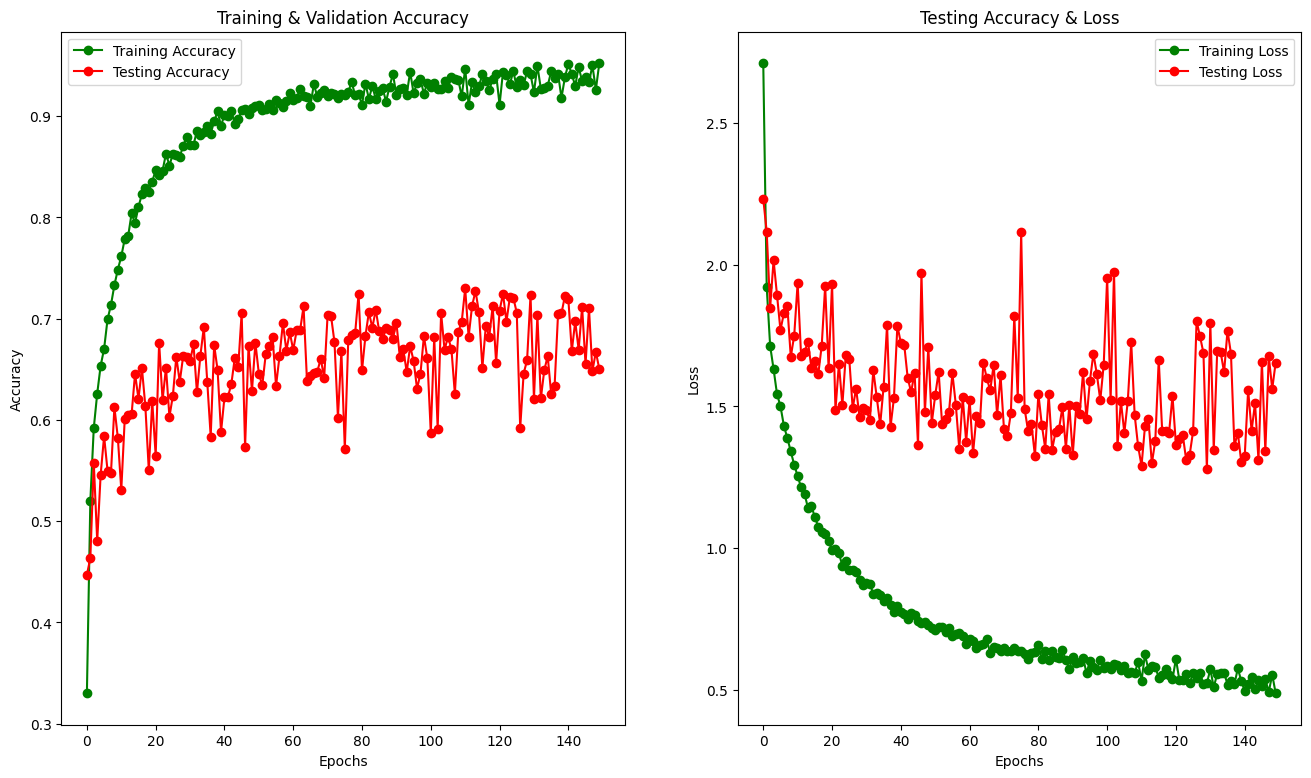

<Figure size 1600x900 with 0 Axes>

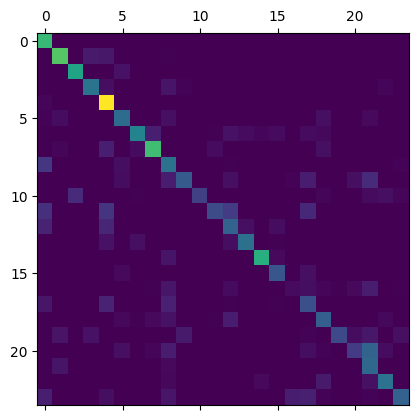

In [11]:
model_tf , history_tf = pipeline_tf((100,50)) # MUCH BIGGER SIZE

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0.07,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.07,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

EPOCHS = 100

X_train_images = X_train.reshape(-1,28,28,1)
X_test_images = X_test.reshape(-1,28,28,1)
datagen.fit(X_train_images)

model_tf_datagen = tf.keras.Sequential()    
model_tf_datagen.add(tf.keras.layers.Flatten(input_shape=( 28, 28, 1)))
for size in (256,128):
    model_tf_datagen.add(tf.keras.layers.Dense(size, activation=tf.nn.relu))
model_tf_datagen.add(tf.keras.layers.Dense(24, activation=tf.nn.softmax))
model_tf_datagen.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model_tf_datagen.summary()
history_tf_datagen = model_tf_datagen.fit(datagen.flow(X_train_images, y_train, batch_size=128), epochs=EPOCHS , validation_data = (X_test_images, y_test), callbacks = [learning_rate_reduction])

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
  1/215 ━━━━━━━━━━━━━━━━━━━━ 3:41 1s/step - accuracy: 0.0469 - loss: 3.2992

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.1958 - loss: 2.7557 - val_accuracy: 0.4611 - val_loss: 1.7780 - learning_rate: 0.0010
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4359 - loss: 1.8270 - val_accuracy: 0.5477 - val_loss: 1.3907 - learning_rate: 0.0010
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5232 - loss: 1.5160 - val_accuracy: 0.6245 - val_loss: 1.1692 - learning_rate: 0.0010
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5909 - loss: 1.2980 - val_accuracy: 0.6509 - val_loss: 1.0660 - learning_rate: 0.0010
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6391 - loss: 1.1347 - val_accuracy: 0.7002 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6877 - loss: 0.9908 - val_accuracy: 0.7097 - val_loss: 0.8551 - learning_rate: 0.0010
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7168 - loss: 0.8952 

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9196 - loss: 0.2731
Accuracy:  0.9180145263671875
F1 score:  0.9019152666462614


<Figure size 1600x900 with 0 Axes>

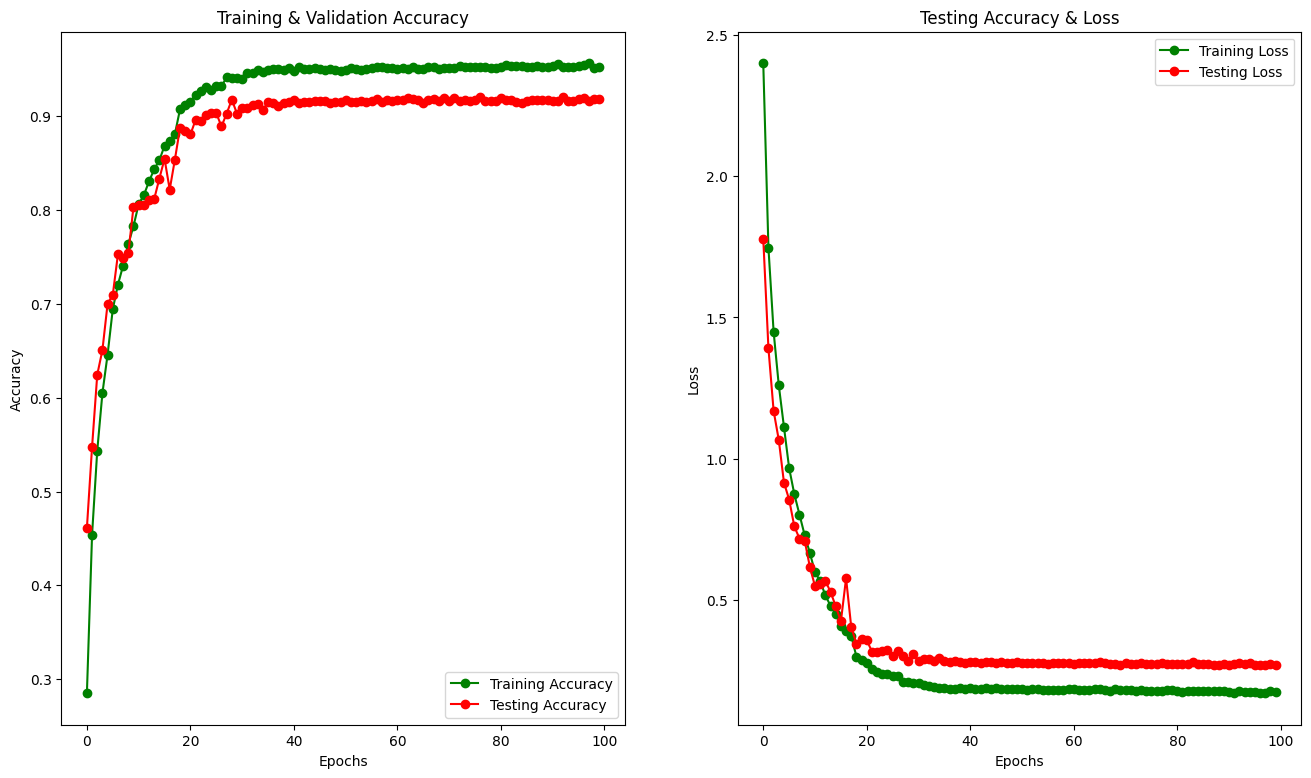

<Figure size 1600x900 with 0 Axes>

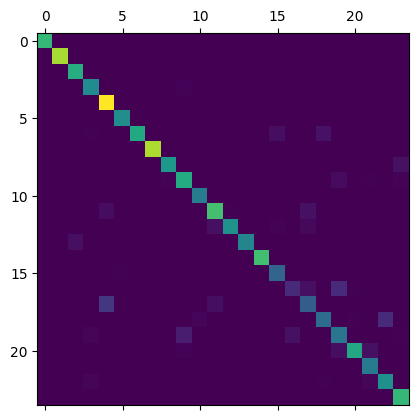

In [13]:
plt.figure(figsize=(16, 9))
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
train_acc = history_tf_datagen.history['accuracy']
train_loss = history_tf_datagen.history['loss']
val_acc = history_tf_datagen.history['val_accuracy']
val_loss = history_tf_datagen.history['val_loss']
fig.set_size_inches(16,9)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
# print accuracy and f1 score in percentage
y_pred = model_tf_datagen.predict(X_test_images)
accuracy = model_tf_datagen.evaluate(X_test_images, y_test)[1]
y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
f1 = f1_score(y_test_label, y_pred_label, average='macro')
print("Accuracy: ", accuracy)
print("F1 score: ", f1)
# plot confusion matrix
cm = confusion_matrix(y_test_label, y_pred_label)
plt.figure(figsize=(16, 9))
plt.matshow(cm)
plt.show()